<a href="https://colab.research.google.com/github/nou321/PFE_Nour/blob/main/Augmentation_Methods_imagaugVf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from google.colab.patches import cv2_imshow
import cv2

from scipy import fftpack
import skimage

import imgaug.augmenters as iaa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

input_path ='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Anonymized images'
resized_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/resized images'
csv_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Anonymized_images.xlsx'

nsj_path ='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/nsj_data'
sj_path ='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data'

sj_fliped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/sj_aug/sj_fliped'
sj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/sj_aug/sj_zoom'
sj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/sj_aug/sj_rotation'
sj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/sj_aug/sj_translation'
sj_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/sj_aug/sj_distortion'
sj_rot_trans_flip='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/sj_aug/sj_fliped_rotation_translation'
sj_flip_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/sj_aug/sj_fliped_distortion'
sj_rot_tran='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/nsj_aug/sj_rotation_translation'

nsj_fliped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/nsj_aug/nsj_fliped'
nsj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/nsj_aug/nsj_zoom'
nsj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/nsj_aug/nsj_rotation'
nsj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/nsj_aug/nsj_translation'
nsj_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/nsj_aug/nsj_distortion'
nsj_rot_trans_flip='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/nsj_aug/nsj_fliped_rotation_translation'
nsj_flip_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/nsj_aug/nsj_fliped_distortion'
nsj_rot_tran='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/augmented_data/nsj_aug/nsj_rotation_translation'


# Méthodes de data augmentation


## rotation


In [ ]:

def rotate_image(image, angle):
    np_image = np.array(image)
    # Applique une rotation d'angle spécifié en degrés
      # Définir l'augmenteur de rotation
    rotation_augmenter = iaa.Affine(rotate=angle)
    # Appliquer l'augmentation
    rotated_image = rotation_augmenter(image=np_image)
    return Image.fromarray(rotated_image)

##redimensionnement


In [ ]:
def resize_image(image, new_size):

    # Définir l'augmenteur de redimensionnement
    resize_augmenter = iaa.Resize(new_size)
    # Appliquer l'augmentation
    resized_image = resize_augmenter(image=image)
    return Image.fromarray(resized_image)

## recadrage


In [ ]:
def crop_image(image):
      # Définir l'augmenteur de recadrage
    crop_augmenter = iaa.Crop(px=(0, 100))
    # Appliquer l'augmentation
    image_aug = crop_augmenter(image=image)
    return Image.fromarray(image_aug)

## Flip

In [ ]:
def flip_image(image):
  # Conversion de l'image en tableau numpy pour faciliter le traitement
    np_image = np.array(image)
      # Définir l'augmenteur de flip horizontal (gauche-droite)
    flip_augmenter = iaa.Fliplr(p=1.0)
    # Appliquer l'augmentation
    image_aug = flip_augmenter(image=np_image)
    pil_image = Image.fromarray(image_aug)
    return pil_image


## Changement de contraste et de luminosité :


In [ ]:
def adjust_contrast(image, alpha, beta):
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return Image.fromarray(adjusted_image)

## Bruit gaussien

In [ ]:
def add_gaussian_blur(image):
    # Définir l'augmenteur de bruit gaussien
    np_image = np.array(image)
    noise_augmenter = iaa.AdditiveGaussianNoise(scale=0.1*255)
    # Appliquer l'augmentation
    image_aug = noise_augmenter(image=np_image)
    return Image.fromarray(image_aug)

##ajout de bruit

In [ ]:
def add_noise(image):
    # Convertir l'image en numpy array
    image_array = np.array(image)
    # Définir l'augmenteur de bruit gaussien
    noise_augmenter = iaa.AdditiveGaussianNoise(scale=0.1*255)
    noisy_image= noise_augmenter(image= image_array)

    return Image.fromarray(noisy_image)


## Luminosté

In [ ]:
def augment_brightness(img, factor):
    """
    Augmente la luminosité de l'image en multipliant chaque pixel par le facteur de luminosité donné.
    """
    # Conversion de l'image en tableau numpy pour faciliter le traitement
    np_image = np.array(img)
    # Définir l'augmenteur de multiplication de la luminosité
    brightness_augmenter = iaa.Multiply(1.2)

    # Appliquer l'augmentation
    image_aug = brightness_augmenter(image=np_image)

    return Image.fromarray(np_image)

## zoom

In [ ]:
# Fonction de zoom
def augment_zooming(img, zoom_factor):
    # Conversion de l'image en tableau numpy pour faciliter le traitement
    np_image = np.array(img)
    # Définir l'augmenteur de zoom
    zoom_augmenter = iaa.Affine(scale=(zoom_factor,zoom_factor))
    # Appliquer l'augmentation
    image_aug = zoom_augmenter(image=np_image)
    return Image.fromarray(image_aug)

## Translation

In [ ]:
def translate_image(image, shift):

    # Créer une nouvelle image vide avec la même taille que l'image d'origine
    translated_image = Image.new(image.mode, image.size)
    # Déplacer les pixels de l'image d'origine vers la nouvelle image en fonction de la quantité de pixels à déplacer
    translated_image.paste(image, shift)
    # Retourner l'image transformée
    return translated_image

## elastic distortion

In [ ]:
def elastic_distortion(img, alpha, sigma, random_state=None):
    """
    alpha -- intensité de la distorsion élastique.
    sigma -- taille du filtre gaussien utilisé pour lisser la distorsion.
    random_state -- objet RandomState pour assurer la reproductibilité.
    """
    np_image = np.array(img)
    # Créer un objet augmenteur pour la transformation de distorsion élastique
    augmenter = iaa.ElasticTransformation(alpha=alpha, sigma=sigma, random_state=random_state)
    # Appliquer la transformation à l'image
    img_aug = augmenter.augment_image(np_image)

    return Image.fromarray(img_aug)

# Teste

In [ ]:
def elastic_distortion2(img, alpha=40, sigma=5, random_state=None):
    """
    Applique la transformation de distorsion élastique (Elastic Distortion) à une image.

    Arguments:
    img -- tableau NumPy représentant l'image d'origine.
    alpha -- intensité de la distorsion élastique.
    sigma -- taille du filtre gaussien utilisé pour lisser la distorsion.
    random_state -- objet RandomState pour assurer la reproductibilité.

    Retourne:
    Le tableau NumPy représentant l'image transformée.
    """
    # Créer un objet augmenteur pour la transformation de distorsion élastique
    augmenter = iaa.ElasticTransformation(alpha=alpha, sigma=sigma, random_state=random_state)

    # Appliquer la transformation à l'image
    img_aug = augmenter.augment_image(img)

    return img_aug

In [ ]:
# Lecture de l'image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/all_data/001.jpg')
img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/all_data/020.jpg')


# Conversion de l'image en niveaux de gris
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
type(gray_img)

# Conversion de l'image en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [ ]:
rotated_img = rotate_image(gray, -5) # faire pivoter l'image de 30 degrés
resized_img = resize_image(gray, (256, 256)) # redimensionner l'image en 256x256
cropped_img = crop_image(gray) # découper une région de l'image à partir des coordonnées

In [ ]:
blurred_img = add_gaussian_blur(gray) # ajouter un flou gaussien avec une taille de noyau de 5x5

flipped_img = flip_image(gray) # refléter l'image horizontalement

adjusted_img = adjust_contrast(gray, alpha=1.5, beta=50) # ajuster le contraste et la luminosité de l'image

noisy_img = add_noise(gray) # ajouter un bruit gaussien

AttributeError: ignored

In [ ]:
zoom_img=augment_zooming(gray,1.1)
lum_img= augment_brightness(gray,1.5)


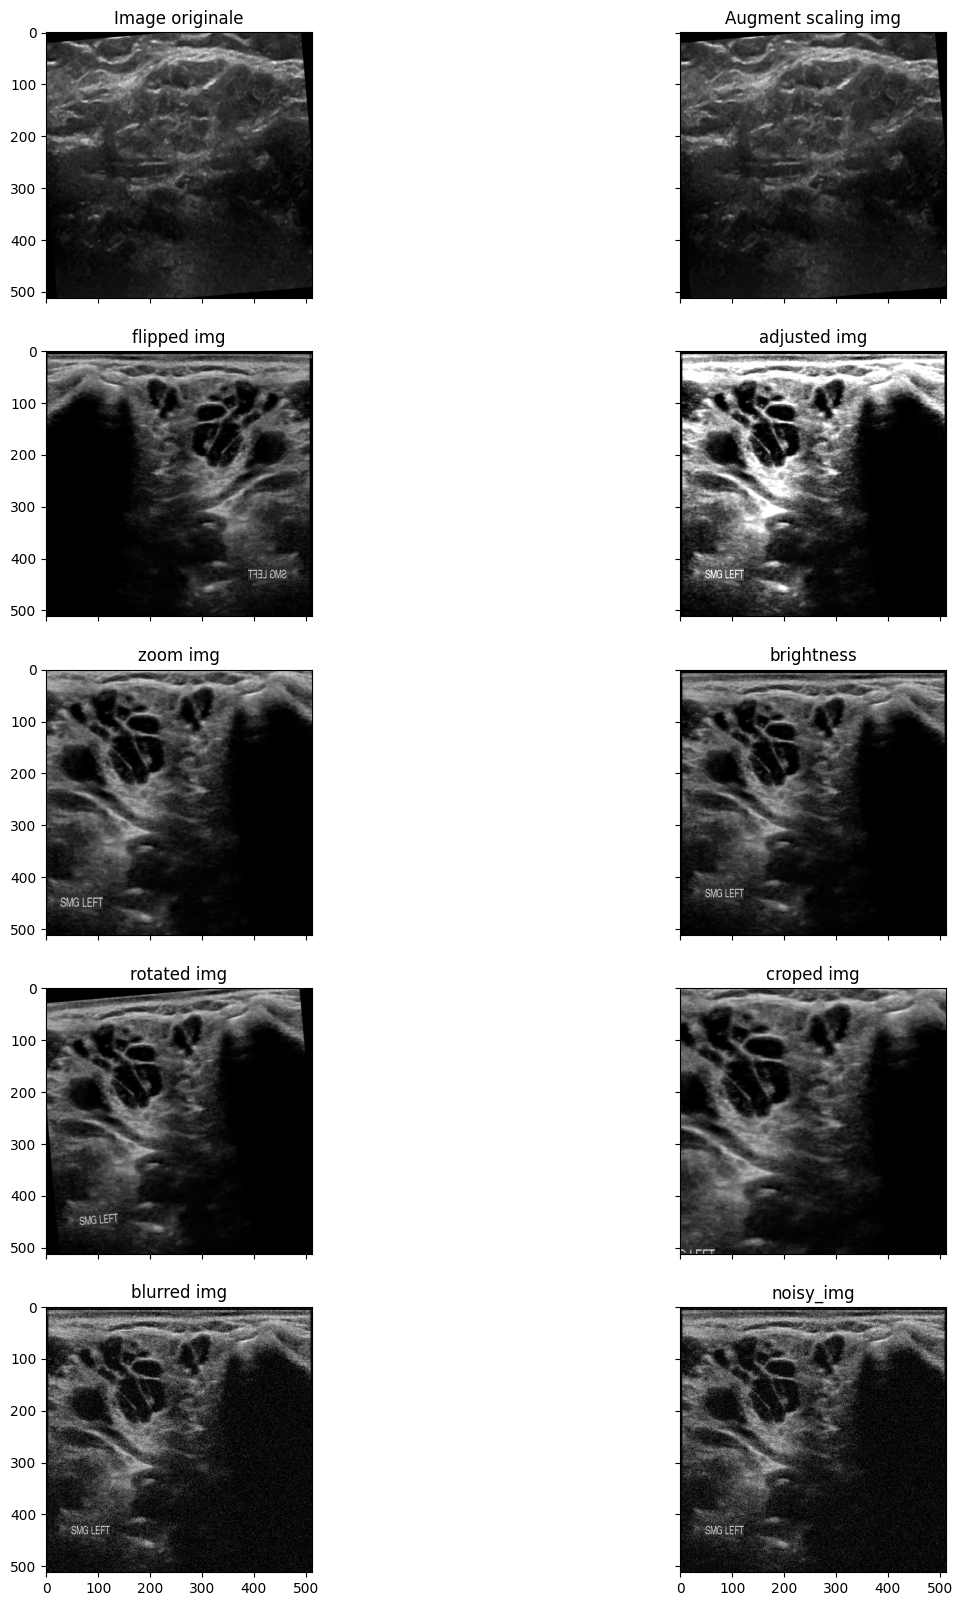

In [ ]:
# Afficher l'image
fig, ax = plt.subplots(5,2, sharex=True, sharey=True,figsize=(15,20))
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title('Image originale')
ax[0,1].imshow(img, cmap='gray')
ax[0,1].set_title('Augment scaling img')
ax[1,0].imshow(flipped_img, cmap='gray')
ax[1,0].set_title("flipped img")
ax[1,1].imshow(adjusted_img, cmap='gray')
ax[1,1].set_title('adjusted img')
ax[2,0].imshow(zoom_img, cmap='gray')
ax[2,0].set_title('zoom img')
ax[2,1].imshow(lum_img, cmap='gray')
ax[2,1].set_title('brightness')
ax[3,0].imshow(rotated_img, cmap='gray')
ax[3,0].set_title('rotated img')
ax[3,1].imshow(cropped_img, cmap='gray')
ax[3,1].set_title("croped img")
ax[4,0].imshow(blurred_img, cmap='gray')
ax[4,0].set_title("blurred img")
ax[4,1].imshow(noisy_img, cmap='gray')
ax[4,1].set_title('noisy_img')
plt.show()

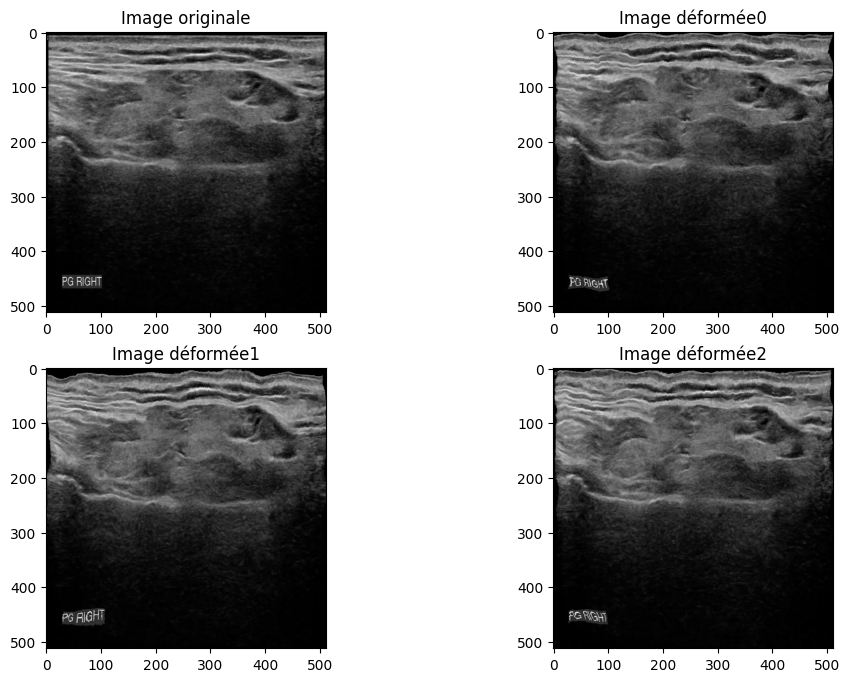

In [ ]:
# Appliquer la transformation élastique
distorted_image0 = elastic_distortion2(gray1, alpha=300, sigma=20,random_state=20)
distorted_image1= elastic_distortion2(gray1, alpha=300, sigma=20,random_state=5)
distorted_image2 = elastic_distortion2(gray1, alpha=300, sigma=20,random_state=25)

# Afficher les images
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0,0].imshow(gray1,cmap='gray')
axes[0,0].set_title('Image originale')
axes[0,1].imshow(distorted_image0,cmap='gray')
axes[0,1].set_title('Image déformée0')
axes[1,0].imshow(distorted_image1,cmap='gray')
axes[1,0].set_title('Image déformée1')
axes[1,1].imshow(distorted_image2,cmap='gray')
axes[1,1].set_title('Image déformée2')


plt.show()

# TEST Data augmentation

## sj

### fliped

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(sj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(sj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')
        # Appliquer une augmentation avec effet mirroir
        img = flip_image(image)
        # Enregistrer l'image avec un nouveau nom
        new_filename = f"{os.path.splitext(file_name)[0]}_Hfliped.jpg"
        img.save(os.path.join(sj_fliped, new_filename))

### rotation

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(sj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(sj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')

        l=[5,-5]
        # Appliquer une augmentation avec effet mirroir
        for i in l:
            img = rotate_image(image,i)
            #Enregistrer l'image avec un nouveau nom
            new_filename = f"{os.path.splitext(file_name)[0]}_"+str(i)+"_rotation.jpg"
            img.save(os.path.join(sj_rotation, new_filename))

### zoom

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(sj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(sj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')
        l=[0.9,1.1]
        # Appliquer une augmentation avec effet mirroir
        for i in l:
            img = augment_zooming(image,i)
            #Enregistrer l'image avec un nouveau nom
            new_filename = f"{os.path.splitext(file_name)[0]}_"+str(i)+"_zoom.jpg"
            img.save(os.path.join(sj_zoom, new_filename))

### translation

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(sj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(sj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')
        l=[(5,5),(-5,-5)]
        # Appliquer une augmentation avec effet mirroir
        for i in l:
            img =translate_image(image,i)
            #Enregistrer l'image avec un nouveau nom
            new_filename = f"{os.path.splitext(file_name)[0]}_"+str(i)+"_translate.jpg"
            img.save(os.path.join(sj_translation, new_filename))

### distortion

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(sj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(sj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')

        img =elastic_distortion(image,alpha=300, sigma=20,random_state=5)
        #Enregistrer l'image avec un nouveau nom
        new_filename = f"{os.path.splitext(file_name)[0]}_(300,20,5)_distortion.jpg"
        img.save(os.path.join(sj_distortion, new_filename))

### filped_rotation_trans

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(sj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(sj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')
        img = flip_image(image)
        l1=[(5,5),(-5,-5)]
        l2=[5,-5]
        # Appliquer une augmentation avec effet mirroir
        for i in l2:
            img1 = rotate_image(img,i)
            # Appliquer une augmentation avec effet mirroir
            for j in l1:
                img2 =translate_image(img1,j)
                #Enregistrer l'image avec un nouveau nom
                new_filename = f"{os.path.splitext(file_name)[0]}_rot_"+str(i)+",tran_"+str(j)+"_flip.jpg"
                img2.save(os.path.join(sj_rot_trans_flip, new_filename))

### distortion_flipd

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(sj_distortion)):
        # Ouverture de l'image
        image = Image.open(os.path.join(sj_distortion, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')
        img = flip_image(image)
        #Enregistrer l'image avec un nouveau nom
        new_filename = f"{os.path.splitext(file_name)[0]}_distor_flip.jpg"
        img.save(os.path.join(sj_flip_distortion, new_filename))

## nsj

### fliped

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(nsj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(nsj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')
        # Appliquer une augmentation avec effet mirroir
        img = flip_image(image)
        # Enregistrer l'image avec un nouveau nom
        new_filename = f"{os.path.splitext(file_name)[0]}_Hfliped.jpg"
        img.save(os.path.join(nsj_fliped, new_filename))

### rotation

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(nsj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(nsj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')

        l=[5,-5]
        # Appliquer une augmentation avec effet mirroir
        for i in l:
            img = rotate_image(image,i)
            #Enregistrer l'image avec un nouveau nom
            new_filename = f"{os.path.splitext(file_name)[0]}_"+str(i)+"_rotation.jpg"
            img.save(os.path.join(nsj_rotation, new_filename))

### zoom

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(nsj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(nsj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')
        l=[0.9,1.1]
        # Appliquer une augmentation avec effet mirroir
        for i in l:
            img = augment_zooming(image,i)
            #Enregistrer l'image avec un nouveau nom
            new_filename = f"{os.path.splitext(file_name)[0]}_"+str(i)+"_zoom.jpg"
            img.save(os.path.join(nsj_zoom, new_filename))

### translation

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(nsj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(nsj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')
        l=[(-5,-5),(5,5)]
        # Appliquer une augmentation avec effet mirroir
        for i in l:
            img =translate_image(image,i)
            #Enregistrer l'image avec un nouveau nom
            new_filename = f"{os.path.splitext(file_name)[0]}_"+str(i)+"_translate.jpg"
            img.save(os.path.join(nsj_translation, new_filename))

### fliped_rotation_translation

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(nsj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(nsj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')
        img = flip_image(image)
        l1=[(-5,-5),(5,5)]
        l2=[5,-5]
        # Appliquer une augmentation avec effet mirroir
        for i in l2:
            img1 = rotate_image(img,i)
            # Appliquer une augmentation avec effet mirroir
            for j in l1:
                img2 =translate_image(img1,j)
                #Enregistrer l'image avec un nouveau nom
                new_filename = f"{os.path.splitext(file_name)[0]}_rot_"+str(i)+",tran_"+str(j)+"_flip.jpg"
                img2.save(os.path.join(nsj_rot_trans_flip, new_filename))

### distotion

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(nsj_path)):
        # Ouverture de l'image
        image = Image.open(os.path.join(nsj_path, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')


        # Appliquer une augmentation avec effet mirroir

        img =elastic_distortion(image,alpha=300, sigma=20,random_state=20)

        #Enregistrer l'image avec un nouveau nom
        new_filename = f"{os.path.splitext(file_name)[0]}_(300,20,20)_distortion.jpg"
        img.save(os.path.join(nsj_distortion, new_filename))

### distortion_fliped

In [ ]:
# Boucle sur les fichiers du dossier, triés par ordre alphabétique
for file_name in sorted(os.listdir(nsj_distortion)):
        # Ouverture de l'image
        image = Image.open(os.path.join(nsj_distortion, file_name))
        # Convertir l'image en niveau de gris
        image = image.convert('L')
        img = flip_image(image)
        #Enregistrer l'image avec un nouveau nom
        new_filename = f"{os.path.splitext(file_name)[0]}_distor_flip.jpg"
        img.save(os.path.join(nsj_flip_distortion, new_filename))